In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2

from utils.constants import *

# 2022

In [65]:
# Load 2022 forward prices
forward_prices_2022 = pd.read_csv('./Day-ahead Prices_202201010000-202301010000.csv',index_col=0)

forward_prices_2022 = forward_prices_2022[['Day-ahead Price [EUR/MWh]']]
forward_prices_2022.rename(columns={'Day-ahead Price [EUR/MWh]':'forward_RE'},inplace=True)

display(forward_prices_2022.head())

,forward_RE
MTU (UTC),
01.01.2022 00:00 - 01.01.2022 01:00,41.33
01.01.2022 01:00 - 01.01.2022 02:00,42.18
01.01.2022 02:00 - 01.01.2022 03:00,44.37
01.01.2022 03:00 - 01.01.2022 04:00,37.67
01.01.2022 04:00 - 01.01.2022 05:00,39.70


In [66]:
# Load 2022 balancing prices
balancing_prices_2022 = pd.read_csv('./Imbalance_202201010000-202301010000.csv',index_col=0)
balancing_prices_2022 = balancing_prices_2022[['+ Imbalance Price [EUR/MWh] - IPA|DK2','- Imbalance Price [EUR/MWh] - IPA|DK2']]

display(balancing_prices_2022.head())

balancing_prices_2022.interpolate(inplace=True)

# Ensure that the + and - prises are the same (single pricing scheme since November 2021)
test = balancing_prices_2022['+ Imbalance Price [EUR/MWh] - IPA|DK2'] == balancing_prices_2022['- Imbalance Price [EUR/MWh] - IPA|DK2'].astype(float)

# Count the number of False values
test.values.any()

,+ Imbalance Price [EUR/MWh] - IPA|DK2,- Imbalance Price [EUR/MWh] - IPA|DK2
Imbalance settlement period (UTC),,
01.01.2022 00:00 - 01.01.2022 01:00,41.33,41.33
01.01.2022 01:00 - 01.01.2022 02:00,42.18,42.18
01.01.2022 02:00 - 01.01.2022 03:00,44.37,44.37
01.01.2022 03:00 - 01.01.2022 04:00,37.67,37.67
01.01.2022 04:00 - 01.01.2022 05:00,39.70,39.70


True

In [67]:
balancing_prices_2022.drop(columns=['- Imbalance Price [EUR/MWh] - IPA|DK2'],inplace=True)
balancing_prices_2022.rename(columns={'+ Imbalance Price [EUR/MWh] - IPA|DK2':'prices_SB'},inplace=True)

In [68]:
data_2022 = forward_prices_2022.join(balancing_prices_2022)
display(data_2022.head())

,forward_RE,prices_SB
MTU (UTC),,
01.01.2022 00:00 - 01.01.2022 01:00,41.33,41.33
01.01.2022 01:00 - 01.01.2022 02:00,42.18,42.18
01.01.2022 02:00 - 01.01.2022 03:00,44.37,44.37
01.01.2022 03:00 - 01.01.2022 04:00,37.67,37.67
01.01.2022 04:00 - 01.01.2022 05:00,39.70,39.70


# 2023

In [69]:
# Load 2023 forward prices
forward_prices_2023 = pd.read_csv('./Day-ahead Prices_202301010000-202401010000.csv',index_col=0)

forward_prices_2023 = forward_prices_2023[['Day-ahead Price [EUR/MWh]']]
forward_prices_2023.rename(columns={'Day-ahead Price [EUR/MWh]':'forward_RE'},inplace=True)

display(forward_prices_2023.head())

,forward_RE
MTU (UTC),
01.01.2023 00:00 - 01.01.2023 01:00,1.38
01.01.2023 01:00 - 01.01.2023 02:00,0.09
01.01.2023 02:00 - 01.01.2023 03:00,0.08
01.01.2023 03:00 - 01.01.2023 04:00,0.05
01.01.2023 04:00 - 01.01.2023 05:00,0.08


In [70]:
# Load 2023 balancing prices
balancing_prices_2023 = pd.read_csv('./Imbalance_202301010000-202401010000.csv',index_col=0)
balancing_prices_2023 = balancing_prices_2023[['+ Imbalance Price [EUR/MWh] - IPA|DK2','- Imbalance Price [EUR/MWh] - IPA|DK2']]

display(balancing_prices_2023.head())

balancing_prices_2023.interpolate(inplace=True)

# Ensure that the + and - prises are the same (single pricing scheme since November 2021)
test = balancing_prices_2023['+ Imbalance Price [EUR/MWh] - IPA|DK2'] == balancing_prices_2023['- Imbalance Price [EUR/MWh] - IPA|DK2'].astype(float)

# Count the number of False values
test.values.any()

,+ Imbalance Price [EUR/MWh] - IPA|DK2,- Imbalance Price [EUR/MWh] - IPA|DK2
Imbalance settlement period (UTC),,
01.01.2023 00:00 - 01.01.2023 01:00,1.38,1.38
01.01.2023 01:00 - 01.01.2023 02:00,-6.00,-6.00
01.01.2023 02:00 - 01.01.2023 03:00,-6.00,-6.00
01.01.2023 03:00 - 01.01.2023 04:00,-6.00,-6.00
01.01.2023 04:00 - 01.01.2023 05:00,-0.40,-0.40


True

In [71]:
balancing_prices_2023.drop(columns=['- Imbalance Price [EUR/MWh] - IPA|DK2'],inplace=True)
balancing_prices_2023.rename(columns={'+ Imbalance Price [EUR/MWh] - IPA|DK2':'prices_SB'},inplace=True)

In [72]:
data_2023 = forward_prices_2023.join(balancing_prices_2023)
display(data_2023.head())

,forward_RE,prices_SB
MTU (UTC),,
01.01.2023 00:00 - 01.01.2023 01:00,1.38,1.38
01.01.2023 01:00 - 01.01.2023 02:00,0.09,-6.00
01.01.2023 02:00 - 01.01.2023 03:00,0.08,-6.00
01.01.2023 03:00 - 01.01.2023 04:00,0.05,-6.00
01.01.2023 04:00 - 01.01.2023 05:00,0.08,-0.40


# Comparison

In [73]:
print("Percentage of time when forward and imbalance prices are equal:",data_2022[data_2022['forward_RE'] == data_2022['prices_SB']].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when imbalance price is higher than forward price:",data_2022[data_2022['forward_RE'] < data_2022['prices_SB']].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when imbalance price is lower than forward price:",data_2022[data_2022['forward_RE'] > data_2022['prices_SB']].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when forward price is lower than hydrogen price:",data_2022[data_2022['forward_RE'] < PRICE_H].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when imbalance price is lower than hydrogen price:",data_2022[data_2022['prices_SB'] < PRICE_H].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when forward price is negative:",data_2022[data_2022['forward_RE'] <= 0].shape[0]/data_2022.shape[0]*100,"%")
print("Percentage of time when imbalance price is negative:",data_2022[data_2022['prices_SB'] <= 0].shape[0]/data_2022.shape[0]*100,"%")

Percentage of time when forward and imbalance prices are equal: 41.906392694063925 %
Percentage of time when imbalance price is higher than forward price: 24.292237442922374 %
Percentage of time when imbalance price is lower than forward price: 33.8013698630137 %
Percentage of time when forward price is lower than hydrogen price: 11.815068493150685 %
Percentage of time when imbalance price is lower than hydrogen price: 17.397260273972602 %
Percentage of time when forward price is negative: 0.10273972602739725 %
Percentage of time when imbalance price is negative: 3.7100456621004563 %


In [74]:
print("Percentage of time when forward and imbalance prices are equal:",data_2023[data_2023['forward_RE'] == data_2023['prices_SB']].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when imbalance price is higher than forward price:",data_2023[data_2023['forward_RE'] < data_2023['prices_SB']].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when imbalance price is lower than forward price:",data_2023[data_2023['forward_RE'] > data_2023['prices_SB']].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when forward price is lower than hydrogen price:",data_2023[data_2023['forward_RE'] < PRICE_H].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when imbalance price is lower than hydrogen price:",data_2023[data_2023['prices_SB'] < PRICE_H].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when forward price is negative:",data_2023[data_2023['forward_RE'] <= 0].shape[0]/data_2023.shape[0]*100,"%")
print("Percentage of time when imbalance price is negative:",data_2023[data_2023['prices_SB'] <= 0].shape[0]/data_2023.shape[0]*100,"%")

Percentage of time when forward and imbalance prices are equal: 41.01598173515982 %
Percentage of time when imbalance price is higher than forward price: 27.14611872146119 %
Percentage of time when imbalance price is lower than forward price: 31.837899543378995 %
Percentage of time when forward price is lower than hydrogen price: 21.940639269406393 %
Percentage of time when imbalance price is lower than hydrogen price: 25.901826484018265 %
Percentage of time when forward price is negative: 3.0136986301369864 %
Percentage of time when imbalance price is negative: 5.445205479452055 %


# Generate day-ahead forecast

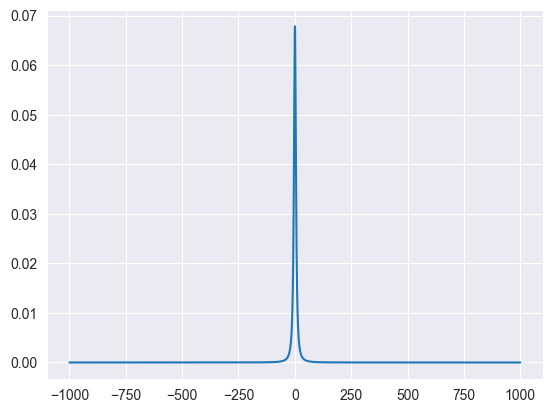

In [108]:
# Load t distribution with params (1.4491729963447435, 0.39017357748618503, 12.091304004963595)
t_dist = stats.t(1.4491729963447435, 0.39017357748618503, 5)

# Plot the t distribution
x = np.linspace(-1000,1000,100000)
y = t_dist.pdf(x)
plt.plot(x,y)
plt.show()

In [115]:
# Add sampled noise to forward prices
noise = t_dist.rvs(data_2022.shape[0])
data_2022['forward_FC'] = data_2022['forward_RE'] + noise
display(data_2022.head())

noise = t_dist.rvs(data_2023.shape[0])
data_2023['forward_FC'] = data_2023['forward_RE'] + noise
display(data_2023.head())

,forward_RE,prices_SB,forward_FC
MTU (UTC),,,
01.01.2022 00:00 - 01.01.2022 01:00,41.33,41.33,57.547726
01.01.2022 01:00 - 01.01.2022 02:00,42.18,42.18,42.775177
01.01.2022 02:00 - 01.01.2022 03:00,44.37,44.37,69.404847
01.01.2022 03:00 - 01.01.2022 04:00,37.67,37.67,39.025886
01.01.2022 04:00 - 01.01.2022 05:00,39.70,39.70,61.991515


,forward_RE,prices_SB,forward_FC
MTU (UTC),,,
01.01.2023 00:00 - 01.01.2023 01:00,1.38,1.38,-7.471185
01.01.2023 01:00 - 01.01.2023 02:00,0.09,-6.00,-7.715855
01.01.2023 02:00 - 01.01.2023 03:00,0.08,-6.00,5.019788
01.01.2023 03:00 - 01.01.2023 04:00,0.05,-6.00,-0.799818
01.01.2023 04:00 - 01.01.2023 05:00,0.08,-0.40,8.262129


In [128]:
data_2022_2023 = pd.concat([data_2022,data_2023],axis=0)
data_2022_2023.index = range(data_2022_2023.shape[0])

In [129]:
final_dataset = pd.read_csv('./2019_2020/2020_data.csv',index_col=0)
display(final_dataset.head())

,forward_RE,forward_FC,UP,DW,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1
0,28.32,35.395866,28.32,28.32,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599
1,10.07,35.127035,10.07,10.07,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060
2,-4.08,-3.707266,-4.08,-4.08,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109
3,-9.91,-17.375766,-9.91,-9.91,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771
4,-7.41,-7.552286,-7.41,-7.41,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011


In [130]:
final_dataset['forward_RE'] = data_2022_2023['forward_RE']
final_dataset.insert(2, 'prices_SB', data_2022_2023['prices_SB'])
final_dataset['forward_FC'] = data_2022_2023['forward_FC']
display(final_dataset.head())

final_dataset.to_csv('./2022_2023_data.csv')

,forward_RE,forward_FC,prices_SB,UP,DW,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1
0,41.33,57.547726,41.33,28.32,28.32,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599
1,42.18,42.775177,42.18,10.07,10.07,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060
2,44.37,69.404847,44.37,-4.08,-4.08,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109
3,37.67,39.025886,37.67,-9.91,-9.91,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771
4,39.70,61.991515,39.70,-7.41,-7.41,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011


In [3]:
dataframe = pd.read_csv('./2022_2023_data.csv',index_col=0)
dataframe.drop(columns=['UP','DW'],inplace=True)
dataframe.to_csv('./2022_2023_data.csv')

# All day-ahead data

In [16]:
main_dataset = pd.read_csv('./2022_2023_data.csv', index_col=0)

In [17]:
df_gen_2022 = pd.read_csv('./Generation Forecast - Day ahead_202201010000-202301010000.csv', index_col=0)
df_gen_2023 = pd.read_csv('./Generation Forecast - Day ahead_202301010000-202401010000.csv', index_col=0)
df_gen = pd.concat([df_gen_2022, df_gen_2023], axis=0, ignore_index=True)
df_gen.head()

,Scheduled Generation [MW] (D) - BZN|DK2,Scheduled Consumption [MW] (D) - BZN|DK2
0,1736.0,NaN
1,1745.0,NaN
2,1710.0,NaN
3,1603.0,NaN
4,1451.0,NaN


In [18]:
df_gen.drop(columns=['Scheduled Consumption [MW] (D) - BZN|DK2'], inplace=True)
df_gen.rename(columns={'Scheduled Generation [MW] (D) - BZN|DK2': 'day_ahead_gen'}, inplace=True)
main_dataset = pd.concat([main_dataset, df_gen], axis=1)
main_dataset.head()

,forward_RE,forward_FC,prices_SB,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1,day_ahead_gen
0,41.33,57.547726,41.33,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599,1736.0
1,42.18,42.775177,42.18,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060,1745.0
2,44.37,69.404847,44.37,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109,1710.0
3,37.67,39.025886,37.67,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771,1603.0
4,39.70,61.991515,39.70,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011,1451.0


In [19]:
df_wind_solar_gen_2022 = pd.read_csv('./Generation Forecasts for Wind and Solar_202201010000-202301010000.csv', index_col=0)
df_wind_solar_gen_2023 = pd.read_csv('./Generation Forecasts for Wind and Solar_202301010000-202401010000.csv', index_col=0)
df_wind_solar_gen = pd.concat([df_wind_solar_gen_2022, df_wind_solar_gen_2023], axis=0, ignore_index=True)
df_wind_solar_gen.head()

,Generation - Solar [MW] Day Ahead/ BZN|DK2,Generation - Solar [MW] Intraday / BZN|DK2,Generation - Solar [MW] Current / BZN|DK2,Generation - Wind Offshore [MW] Day Ahead/ BZN|DK2,Generation - Wind Offshore [MW] Intraday / BZN|DK2,Generation - Wind Offshore [MW] Current / BZN|DK2,Generation - Wind Onshore [MW] Day Ahead/ BZN|DK2,Generation - Wind Onshore [MW] Intraday / BZN|DK2,Generation - Wind Onshore [MW] Current / BZN|DK2
0,0.0,NaN,0.0,311.0,NaN,363,245,NaN,316
1,0.0,NaN,0.0,316.0,NaN,341,263,NaN,318
2,0.0,NaN,0.0,294.0,NaN,323,253,NaN,291
3,0.0,NaN,0.0,294.0,NaN,314,235,NaN,239
4,0.0,NaN,0.0,280.0,NaN,309,215,NaN,251


In [20]:
df_wind_solar_gen.drop(columns=['Generation - Solar  [MW] Intraday / BZN|DK2','Generation - Solar  [MW] Current / BZN|DK2','Generation - Wind Offshore  [MW] Intraday / BZN|DK2','Generation - Wind Offshore  [MW] Current / BZN|DK2','Generation - Wind Onshore  [MW] Intraday / BZN|DK2','Generation - Wind Onshore  [MW] Current / BZN|DK2'], inplace=True)

In [21]:
df_wind_solar_gen.rename(columns={'Generation - Solar  [MW] Day Ahead/ BZN|DK2': 'day_ahead_solar_gen','Generation - Wind Offshore  [MW] Day Ahead/ BZN|DK2': 'day_ahead_wind_offshore_gen','Generation - Wind Onshore  [MW] Day Ahead/ BZN|DK2': 'day_ahead_wind_onshore_gen'}, inplace=True)
main_dataset = pd.concat([main_dataset, df_wind_solar_gen], axis=1)
main_dataset.head()

,forward_RE,forward_FC,prices_SB,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1,day_ahead_gen,day_ahead_solar_gen,day_ahead_wind_offshore_gen,day_ahead_wind_onshore_gen
0,41.33,57.547726,41.33,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599,1736.0,0.0,311.0,245
1,42.18,42.775177,42.18,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060,1745.0,0.0,316.0,263
2,44.37,69.404847,44.37,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109,1710.0,0.0,294.0,253
3,37.67,39.025886,37.67,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771,1603.0,0.0,294.0,235
4,39.70,61.991515,39.70,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011,1451.0,0.0,280.0,215


In [22]:
df_load_2022 = pd.read_csv('./Total Load - Day Ahead _ Actual_202201010000-202301010000.csv', index_col=0)
df_load_2023 = pd.read_csv('./Total Load - Day Ahead _ Actual_202301010000-202401010000.csv', index_col=0)

In [23]:
df_load = pd.concat([df_load_2022, df_load_2023], axis=0, ignore_index=True)
df_load.head()

,Day-ahead Total Load Forecast [MW] - BZN|DK2,Actual Total Load [MW] - BZN|DK2
0,1340,1340
1,1280,1284
2,1238,1244
3,1212,1230
4,1205,1200


In [24]:
df_load = df_load[['Day-ahead Total Load Forecast [MW] - BZN|DK2']]
df_load.rename(columns={'Day-ahead Total Load Forecast [MW] - BZN|DK2': 'day_ahead_load'}, inplace=True)
main_dataset = pd.concat([main_dataset, df_load], axis=1)
main_dataset.head()

,forward_RE,forward_FC,prices_SB,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1,day_ahead_gen,day_ahead_solar_gen,day_ahead_wind_offshore_gen,day_ahead_wind_onshore_gen,day_ahead_load
0,41.33,57.547726,41.33,0.995098,1.000000,0.274701,0.506045,0.680247,0.659599,1736.0,0.0,311.0,245,1340
1,42.18,42.775177,42.18,1.000000,1.000000,0.356135,0.541451,0.796296,0.671060,1745.0,0.0,316.0,263,1280
2,44.37,69.404847,44.37,1.000000,0.776486,0.279045,0.219344,0.728395,0.638109,1710.0,0.0,294.0,253,1238
3,37.67,39.025886,37.67,0.995098,0.935938,0.228013,0.201209,0.698765,0.619771,1603.0,0.0,294.0,235,1212
4,39.70,61.991515,39.70,1.000000,1.000000,0.221498,0.201209,0.690123,0.604011,1451.0,0.0,280.0,215,1205


In [25]:
main_dataset = main_dataset[:-2*HOURS_PER_DAY]
main_dataset.isnull().sum()

forward_RE                       0
forward_FC                       0
prices_SB                        0
production_RE                    0
production_FC                    0
Offshore DK2                     0
Offshore DK1                     0
Onshore DK2                      0
Onshore DK1                      0
day_ahead_gen                   24
day_ahead_solar_gen            192
day_ahead_wind_offshore_gen     24
day_ahead_wind_onshore_gen       0
day_ahead_load                   0
dtype: int64

In [26]:
#Interpolating missing values
main_dataset.interpolate(method='linear', inplace=True)

In [27]:
main_dataset.to_csv('./2023_data_with_imbalance.csv', index=True)